<a href="https://colab.research.google.com/github/widyadaridhyp/Case-Study-01-Data-Mining-Kelompok-F/blob/main/Studi_Kasus_1_Data_Mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings; warnings.simplefilter('ignore')
import scipy, itertools, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Data Understanding (DU):

Keterangan Varabel:
* Created_at: Tanggal dimana iklan rumah dibuat
* LT		: Luas Tanah properti yang ditawarkan
* LB		: Luas Bangunan properti yang ditawarkan
* KT		: Jumlah Kamar Tidur properti yang ditawarkan
* KM		: Jumlah Kamar Mandi properti yang ditawarkan
* Garasi	: Jumlah Kapasitas Garasi di properti yang ditawarkan
* Carport	: Jumlah kapasitas Carport di properti yang ditawarkan
* Lokasi	: Detail lokasi properti yang ditawarkan
* Sertifikat: Jenis sertifikat properti yang ditawarkan
* Listrik	: Daya listrik dari properti yang ditawarkan
* Hadap		: Keterangan property yang ditawarkan menghadap ke arah mana
* Harga 	: Harga property yang ditawarkan dalam Rupiah
* URL		: Alamat tautan (link) property yang ditawarkan.
* Deskripsi	: Deskripsi iklan property yang ditawarkan. 

In [ ]:
# Loading Data:
import pandas as pd

!mkdir data
!wget -P data/ https://raw.githubusercontent.com/taufiksutanto/ADM-Case-01-EDA/master/data/jakarta.csv
!wget -P data/ https://raw.githubusercontent.com/taufiksutanto/ADM-Case-01-EDA/master/data/depok.csv
!wget -P data/ https://raw.githubusercontent.com/taufiksutanto/ADM-Case-01-EDA/master/data/bogor.csv
!wget -P data/ https://raw.githubusercontent.com/taufiksutanto/ADM-Case-01-EDA/master/data/tangerang.csv
!wget -P data/ https://raw.githubusercontent.com/taufiksutanto/ADM-Case-01-EDA/master/data/bekasi.csv
dfJ = pd.read_csv("data/jakarta.csv", low_memory = False, encoding='utf8')
dfD = pd.read_csv("data/depok.csv", low_memory = False, encoding='utf8')
dfB = pd.read_csv("data/bogor.csv", low_memory = False, encoding='utf8')
dfT = pd.read_csv("data/tangerang.csv", low_memory = False, encoding='utf8')
dfX = pd.read_csv("data/bekasi.csv", low_memory = False, encoding='utf8')
    
dfJ.shape, dfD.shape, dfB.shape, dfT.shape, dfX.shape

mkdir: cannot create directory ‘data’: File exists
--2022-09-23 08:12:20--  https://raw.githubusercontent.com/taufiksutanto/ADM-Case-01-EDA/master/data/jakarta.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 63832 (62K) [text/plain]
Saving to: ‘data/jakarta.csv.5’

jakarta.csv.5       100%[===================>]  62.34K  --.-KB/s    in 0.01s   

2022-09-23 08:12:20 (4.88 MB/s) - ‘data/jakarta.csv.5’ saved [63832/63832]

--2022-09-23 08:12:20--  https://raw.githubusercontent.com/taufiksutanto/ADM-Case-01-EDA/master/data/depok.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP 

((1024, 26), (998, 26), (999, 26), (128, 26), (992, 26))

In [ ]:
dfJ

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,06-12-2021,202.0,198.0,8.0,3.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,02-12-2021,30.0,55.0,2.0,1.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,06-12-2021,19.0,35.0,2.0,1.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,06-12-2021,33.0,42.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,06-12-2021,30.0,55.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dfD

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,6-12-2021,165,200.0,4.0,2.0,NaN,1.0,Sukmajaya,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6-12-2021,50,45.0,2.0,1.0,NaN,NaN,Cipayung,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6-12-2021,50,36.0,2.0,1.0,NaN,1.0,Sawangan,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6-12-2021,50,45.0,2.0,1.0,NaN,NaN,Cimanggis,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6-12-2021,72,45.0,2.0,1.0,NaN,1.0,Sawangan,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dfJ.columns

Index(['created_at', 'LT', 'LB', 'KT', 'KM', 'garasi', 'carport', 'lokasi',
       'sertifikat', 'listrik', 'hadap', 'harga', 'URL', 'deskripsi',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')

In [ ]:
dfD.columns

Index(['created_at', 'LT', 'LB', 'KT', 'KM', 'garasi', 'carport', 'lokasi',
       'sertifikat', 'listrik', 'hadap', 'harga', 'URL', 'deskripsi',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')

In [ ]:
dfB.columns

Index(['created_at', 'LT', 'LB', 'KT', 'KM', 'garasi', 'carport', 'lokasi',
       'sertifikat', 'listrik', 'hadap', 'harga', 'URL', 'deskripsi',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')

In [ ]:
print(dfJ.shape)
dfJ.isna().sum()

(1024, 26)


created_at      903
LT              903
LB              903
KT              903
KM              903
garasi          980
carport         934
lokasi          903
sertifikat      905
listrik         904
hadap           988
harga           903
URL             903
deskripsi       912
Unnamed: 14    1024
Unnamed: 15    1024
Unnamed: 16    1024
Unnamed: 17    1024
Unnamed: 18    1024
Unnamed: 19    1024
Unnamed: 20    1024
Unnamed: 21    1024
Unnamed: 22    1024
Unnamed: 23    1024
Unnamed: 24    1024
Unnamed: 25    1024
dtype: int64

In [ ]:
print(dfD.shape)
dfD.isna().sum()

(998, 26)


created_at     879
LT             878
LB             880
KT             880
KM             880
garasi         973
carport        904
lokasi         880
sertifikat     880
listrik        895
hadap          936
harga          880
URL            880
deskripsi      880
Unnamed: 14    998
Unnamed: 15    998
Unnamed: 16    998
Unnamed: 17    998
Unnamed: 18    998
Unnamed: 19    998
Unnamed: 20    998
Unnamed: 21    998
Unnamed: 22    998
Unnamed: 23    998
Unnamed: 24    998
Unnamed: 25    998
dtype: int64

In [ ]:
print(dfB.shape)
dfB.isna().sum()

(999, 26)


created_at     806
LT             806
LB             806
KT             806
KM             806
garasi         806
carport        806
lokasi         806
sertifikat     806
listrik        806
hadap          980
harga          806
URL            806
deskripsi      806
Unnamed: 14    999
Unnamed: 15    999
Unnamed: 16    999
Unnamed: 17    999
Unnamed: 18    999
Unnamed: 19    999
Unnamed: 20    999
Unnamed: 21    999
Unnamed: 22    999
Unnamed: 23    999
Unnamed: 24    999
Unnamed: 25    999
dtype: int64

In [ ]:
print(dfT.shape)
dfT.isna().sum()

(128, 26)


created_at       4
LT               4
LB               4
KT               4
KM               4
garasi          90
carport         36
lokasi           4
sertifikat       6
listrik         17
hadap           79
harga            4
URL              4
deskripsi        4
Unnamed: 14    128
Unnamed: 15    128
Unnamed: 16    128
Unnamed: 17    128
Unnamed: 18    128
Unnamed: 19    128
Unnamed: 20    128
Unnamed: 21    128
Unnamed: 22    128
Unnamed: 23    128
Unnamed: 24    128
Unnamed: 25    128
dtype: int64

In [ ]:
print(dfX.shape)
dfX.isna().sum()

(992, 26)


created_at     885
LT             885
LB             885
KT             885
KM             886
garasi         959
carport        911
lokasi         885
sertifikat     886
listrik        891
hadap          944
harga          885
URL            885
deskripsi      885
Unnamed: 14    992
Unnamed: 15    992
Unnamed: 16    992
Unnamed: 17    992
Unnamed: 18    992
Unnamed: 19    992
Unnamed: 20    992
Unnamed: 21    992
Unnamed: 22    992
Unnamed: 23    992
Unnamed: 24    992
Unnamed: 25    992
dtype: int64

## Data Gabungan

In [ ]:
df = pd.concat([dfJ,dfD,dfB,dfT,dfX],ignore_index=True)
df.sample(10)

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
2619,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
579,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1861,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1105,5-12-2021,59,51.0,2.0,2.0,NaN,2.0,Sukmajaya,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4077,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
916,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print(df.shape)
df.drop(df.iloc[:,14:],axis=1,inplace=True)

(4141, 26)


In [ ]:
df.shape

(4141, 14)

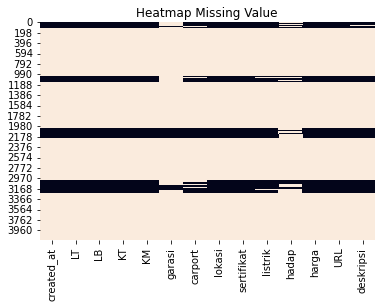

In [ ]:
sns.heatmap(df.isnull(),cbar=False)
plt.title('Heatmap Missing Value')
plt.show()

In [ ]:
df.dropna(how = 'all', inplace = True)
df

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
0,06-12-2021,202.0,198.0,8.0,3.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,NaN,4.500000e+09,https://www.rumah.com/listing-properti/dijual-...,Dekat Cikini Salemba Taman Isamail Marzuki Kam...
1,02-12-2021,30.0,55.0,2.0,1.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,NaN,1.100000e+09,https://www.rumah.com/listing-properti/dijual-...,"Mengusung konsep minimalis, dan didukung denga..."
2,06-12-2021,19.0,35.0,2.0,1.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,NaN,3.950000e+08,https://www.rumah.com/listing-properti/dijual-...,"Dekat dengan Mall Atrium Senen, dekat dengan a..."
3,06-12-2021,33.0,42.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,NaN,8.350000e+08,https://www.rumah.com/listing-properti/dijual-...,"Berlokasi sangat strategis, sangat dekat ke Tu..."
4,06-12-2021,30.0,55.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,NaN,1.100000e+09,https://www.rumah.com/listing-properti/dijual-...,"Bisa request ubah tata ruang, beli 2 unit mend..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3251,01-12-2021,180.0,220.0,5.0,3.0,NaN,NaN,Kota Bekasi,SHM,2200.0,NaN,1.600000e+09,https://www.rumah123.com/properti/bekasi/hos92...,Akses pintu tol Bekasibarat; Dekat Mall Summar...
3252,01-12-2021,140.0,250.0,3.0,2.0,NaN,NaN,Kabupaten Bekasi,SHM,2200.0,Selatan,8.500000e+08,https://www.rumah123.com/properti/bekasi/hos92...,"DIJUAL RUMAH, Taman Kebalen bekasi cluster, Ju..."
3253,01-12-2021,60.0,55.0,2.0,1.0,NaN,NaN,Kabupaten Bekasi,SHM,1300.0,NaN,2.500000e+08,https://www.rumah123.com/properti/bekasi/hos92...,"Di jual Rumah Lelang Bank Pondok Ungu Permai, ..."
3254,01-12-2021,36.0,60.0,2.0,1.0,NaN,NaN,Kabupaten Bekasi,SHM,1300.0,Timur,3.000000e+08,https://www.rumah123.com/properti/bekasi/hos92...,"Lokasi Super Strategis, Selangkah menuju Kota ..."


In [ ]:
print(df.shape)
df.isna().sum()

(665, 14)


created_at      1
LT              0
LB              2
KT              2
KM              3
garasi        332
carport       115
lokasi          2
sertifikat      7
listrik        37
hadap         451
harga           2
URL             2
deskripsi      11
dtype: int64

In [ ]:
print(df['lokasi'].unique())
print(df['sertifikat'].unique())
print(df['hadap'].unique())

['Jakarta Pusat' 'Jakarta Selatan' 'Jakarta Barat' 'Jakarta Utara '
 'Jakarta Timur' 'Sukmajaya' 'Cipayung' 'Sawangan' 'Cimanggis' 'Cinere'
 'Pancoran Mas' 'Limo' 'Tapos' 'Bojong Sari' 'Beji' 'Cilodong' nan
 'Bojonggede' 'Babakan Madang' 'Cibinong' 'Gunung Putri' 'Tanah Sareal'
 'Bogor Selatan' 'Bogor Barat' 'Parung' 'Kemang' 'Cileungsi'
 'Gunungsindur' 'Bogor Timur' 'Bogor Utara' 'Parung Panjang' 'Jonggol'
 'Ciseeng' 'Ciomas' 'Ciampea' 'Tajurhalang' 'Cipanas' 'Megamendung'
 'Tenjo' 'Bogor Tengah' 'Sukaraja' 'Rumpin' 'Dramaga' 'Ranca Bungur'
 'BSD CITY, TANGERANG' 'CISAUK, TANGERANG' 'CILEDUG, TANGERANG'
 'LIPPO KARAWACI, TANGERANG' 'PONDOK CABE, TANGERANG' 'MAUK, TANGERANG'
 'SEPATAN, TANGERANG' 'CIKUPA CITRA JAYA, TANGERANG'
 'PONDOK JAGUNG, TANGERANG' 'PASAR KEMIS, TANGERANG'
 'ALAM SUTERA, TANGERANG' 'GRAHA RAYA, TANGERANG' 'BENDA, TANGERANG'
 'BANJAR WIJAYA, TANGERANG' 'SERPONG, TANGERANG SELATAN' 'BSD, TANGERANG'
 'CIPONDOH, TANGERANG' 'BSD EMINENT, TANGERANG' 'BSD THE ICON, TANG

In [ ]:
df.dtypes

created_at     object
LT             object
LB            float64
KT            float64
KM            float64
garasi        float64
carport       float64
lokasi         object
sertifikat     object
listrik       float64
hadap          object
harga         float64
URL            object
deskripsi      object
dtype: object

In [ ]:
print(df['garasi'].unique())
print(df['carport'].unique())

[nan  1.  2.  3.  4.  7.  8.  5.  6.  0. 10.]
[nan  1.  2.  5.  3.  4.  8. 10.  6.  7.  0.]


In [ ]:
print(df['LT'].unique())

[202.0 30.0 19.0 33.0 217.0 424.0 597.0 60.0 71.0 75.0 45.0 24.0 3422.0
 23.0 50.0 652.0 840.0 21.0 16.0 700.0 18.0 1000.0 189.0 390.0 124.0 225.0
 290.0 432.0 243.0 239.0 130.0 97.0 485.0 90.0 511.0 205.0 695.0 135.0
 612.0 790.0 950.0 738.0 719.0 85.0 47.0 160.0 84.0 147.0 49.0 52.0 79.0
 140.0 400.0 119.0 184.0 863.0 120.0 500.0 200.0 128.0 300.0 168.0 170.0
 98.0 330.0 144.0 260.0 162.0 36.0 150.0 240.0 250.0 175.0 375.0 320.0
 640.0 80.0 232.0 153.0 317.0 95.0 100.0 72.0 112.0 69.0 109.0 86.0 96.0
 67.0 122.0 220.0 70.0 315.0 '165' '50' '72' '40' '45' '36' '87' '210'
 '60' '70' '200' '57' '100' '97' '112' '84' '75' '487' '378' '400' '77'
 '1024' '120' '151' '885' '54' '249' '76' '66' '79' '78' '105' '63' '62'
 '71' '92' '96' '65' '104' '110' '64' '51' '85' '81' '59' '88' '47' '55'
 '82' '185' '880' '74' '335' '83' '94' '80'
 '- lokasi yang kami gunakan hanya per kecamatan'
 '-harga yang kami gunakan adalah per satuan juta' 125.0 312.0 105.0 78.0
 1500.0 699.0 66.0 314.0 1272.0 338

In [ ]:
df.drop(df.index[df['LT'].isin(['- lokasi yang kami gunakan hanya per kecamatan', '-harga yang kami gunakan adalah per satuan juta'])], inplace = True)
df['LT'] = df['LT'].astype('float')
df['lokasi'] = df['lokasi'].astype('category')
df['sertifikat'] = df['sertifikat'].astype('category')
df['hadap'] = df['hadap'].astype('category')

In [ ]:
df.describe()

,LT,LB,KT,KM,garasi,carport,listrik,harga
count,663.000000,663.000000,663.000000,662.000000,333.000000,550.000000,628.000000,6.630000e+02
mean,163.779789,151.380090,3.155354,2.303625,0.828829,1.494545,3057.961783,2.188769e+09
std,242.135058,199.432867,1.387797,1.374047,1.290889,1.080953,4770.949803,7.596722e+09
min,16.000000,15.000000,1.000000,1.000000,0.000000,0.000000,900.000000,4.100000e+01
25%,68.000000,50.000000,2.000000,1.000000,0.000000,1.000000,1300.000000,1.950000e+03
50%,94.000000,83.000000,3.000000,2.000000,0.000000,1.000000,2200.000000,4.560000e+08
75%,160.000000,180.000000,4.000000,3.000000,1.000000,2.000000,2200.000000,1.350000e+09
max,3422.000000,2500.000000,10.000000,10.000000,10.000000,10.000000,66000.000000,1.050000e+11


In [ ]:
df.describe(include='all')

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
count,663,663.000000,663.000000,663.000000,662.000000,333.000000,550.000000,663,658,628.000000,214,6.630000e+02,663,654
unique,26,NaN,NaN,NaN,NaN,NaN,NaN,86,11,NaN,15,NaN,652,602
top,06-12-2021,NaN,NaN,NaN,NaN,NaN,NaN,Kota Bekasi,SHM,NaN,Selatan,NaN,https://www.rumah123.com/perumahan-baru/proper...,Dekat dengan berbagai fasilitas seperti :\nSek...
freq,123,NaN,NaN,NaN,NaN,NaN,NaN,73,552,NaN,56,NaN,6,8
mean,NaN,163.779789,151.380090,3.155354,2.303625,0.828829,1.494545,NaN,NaN,3057.961783,NaN,2.188769e+09,NaN,NaN
std,NaN,242.135058,199.432867,1.387797,1.374047,1.290889,1.080953,NaN,NaN,4770.949803,NaN,7.596722e+09,NaN,NaN
min,NaN,16.000000,15.000000,1.000000,1.000000,0.000000,0.000000,NaN,NaN,900.000000,NaN,4.100000e+01,NaN,NaN
25%,NaN,68.000000,50.000000,2.000000,1.000000,0.000000,1.000000,NaN,NaN,1300.000000,NaN,1.950000e+03,NaN,NaN
50%,NaN,94.000000,83.000000,3.000000,2.000000,0.000000,1.000000,NaN,NaN,2200.000000,NaN,4.560000e+08,NaN,NaN
75%,NaN,160.000000,180.000000,4.000000,3.000000,1.000000,2.000000,NaN,NaN,2200.000000,NaN,1.350000e+09,NaN,NaN


# SOAL 1
### Kualitas data yang dimiliki perusahaan
* Terdapat kolom yang semua barisnya kosong, yaitu kolom dengan awalan 'unnamed'. Sehingga kolom ini tidak diperlukan
* Terdapat banyak baris yang memiliki missing value
* Terdapat tipe data yang tidak sesuai, yaitu variabel Luas Tanah yang seharusnya numerik, variabel Sertifikat dan Hadap yang seharusnya bertipe data kategori.
* Terdapat data yang tidak relevan di Luas Tanah, seharusnya berisikan luas tanah dalam angka, tetapi malah berupa kalimat
* cek duplikat
* Cek noise
* Cek outlier
* Terdapat kolom yang semua barisnya kosong dan tidak diketahui kegunaannya, yaitu kolom dengan awalan 'unnamed'.
* Terdapat banyak baris yang memiliki missing value
* Terdapat tipe data yang tidak sesuai, yaitu variabel Luas Tanah seharusnya numerik, Lokasi, Sertifikat, dan Hadap seharusnya kategori.
* Terdapat data di Luas Tanah yang tidak sesuai, seharusnya luas tanah dalam angka, tetapi terdapat data yang berupa kalimat sehingga tidak relevan.
* Tidak terdapat data yang duplikat

# SOAL 2

### Apakah ada saran perbaikan data ke DE/DBA perusahaan agar RPPI menjadi data driven company yang unggul?

* Data sebaiknya di update secara berkala untuk mengurangi data missing value
* Mengoreksi tipe variabel dari data yang kurang tepat
* Menambahkan variabel yang berisikan alamat lengkap dari lokasi
* Pengumpulan data harga rumah seharusnya disamakan satuannya.
* Memastikan data yang dikumpulkan telah relevan

# SOAL 3
### Dari data yang ada, apakah ada kecenderungan rumah disuatu kota lebih mahal/murah dibandingkan kota lain?

Dilihat dari rata-rata tiap kota, terdapat kecenderungan harga rumah di Depok memiliki harga terendah dan harga rumah di jakarta memiliki harga tertinggi

In [ ]:
dfJ.dropna(how='all',inplace=True)
dfB.dropna(how='all',inplace=True)
dfD.dropna(how='all',inplace=True)
dfT.dropna(how='all',inplace=True)
dfX.dropna(how='all',inplace=True)

In [ ]:
dfT=dfT[dfT['lokasi'].notna()]
dfJ=dfJ[dfJ['lokasi'].notna()]
dfB=dfB[dfB['lokasi'].notna()]
dfD=dfD[dfD['lokasi'].notna()]
dfX=dfX[dfX['lokasi'].notna()]

In [ ]:
df.groupby(['lokasi'])['harga'].mean()

lokasi
ALAM SUTERA, TANGERANG       2.075000e+03
BANJAR WIJAYA, TANGERANG     1.950000e+03
BENDA, TANGERANG             2.900000e+03
BSD BUKIT GOLF, TANGERANG    1.000000e+05
BSD CITY, TANGERANG          4.340952e+03
                                 ...     
Sukmajaya                    1.640778e+03
Tajurhalang                  3.126586e+08
Tanah Sareal                 8.800160e+08
Tapos                        6.257500e+02
Tenjo                        1.680000e+08
Name: harga, Length: 86, dtype: float64

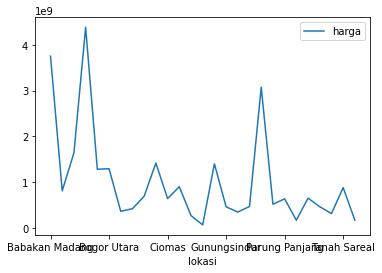

In [ ]:
dfB.groupby(['lokasi'])['harga'].mean().plot(legend=True)

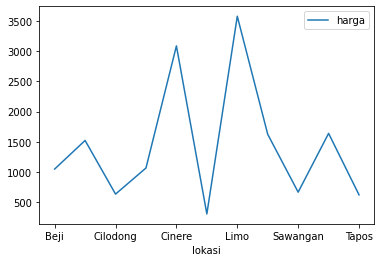

In [ ]:
dfD.groupby(['lokasi'])['harga'].mean().plot(legend=True)

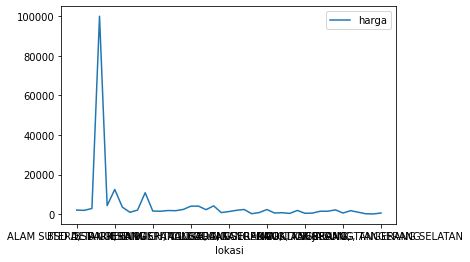

In [ ]:
dfT.groupby(['lokasi'])['harga'].mean().plot(legend=True)

In [ ]:
print('rata-rata harga rumah Jakarta: ', dfJ['harga'].mean())
print('rata-rata harga rumah Bogor: ', dfB['harga'].mean())
print('rata-rata harga rumah Depok: ', dfD['harga'].mean())
print('rata-rata harga rumah Tangerang: ', dfT['harga'].mean())
print('rata-rata harga rumah Bekasi: ', dfX['harga'].mean())

rata-rata harga rumah Jakarta:  8985954975.644629
rata-rata harga rumah Bogor:  1289361525.1865284
rata-rata harga rumah Depok:  1194.4406779661017
rata-rata harga rumah Tangerang:  3849.5564516129034
rata-rata harga rumah Bekasi:  1074823355.140187


Dilihat dari rata-rata tiap kota, terdapat kecenderungan harga rumah di Depok memiliki harga terendah dan harga rumah di jakarta memiliki harga tertinggi

# SOAL 4
### Dari data yang ada, apakah bisa dibuat rekomendasi sebaiknya RPPI membuat kantor cabang berikutnya di kota mana? Mengapa? (Asumsikan RPPI belum memiliki cabang di kota-kota yang disebutkan di data)

# SOAL 5

Rumah dengan karakteristik seperti apa yang paling banyak dijual?

Karakteristik dari rumah yang banyak dijual, yaitu rumah dengan Luas Tanah = 60, Luas Bangunan = 36, Kamar tidur berjumlah 2, Kamar mandi berjumlah 2, tidak memiliki garasi, carport berjumlah 1, daya listrik yang ditawarkan 2200

In [ ]:
df[['LT','LB','KT','KM','garasi','carport','listrik']].mode()

,LT,LB,KT,KM,garasi,carport,listrik
0,60.0,36.0,2.0,2.0,0.0,1.0,2200.0


# SOAL 6
### Jika RPPI ingin melakukan investasi (max) Rp. 25 Milyar minggu besok, apakah dari data anda dapat memberikan rekomendasi rumah mana saja yang akan berpotensi menghasilkan keuntungan bagi perusahaan?

Rumah yang direkomendasikan berada di kota Depok karena memiliki rata-rata harga yang rendah dibandingkan dengan harga rumah di kota- kota lainnya sehingga hal tersebut dapat menghasilkan keuntungan bagi perusahaan

# SOAL 7 
### Dan yang terpenting, informasi berharga apa lagi yang bisa anda dapatkan dari data?